In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Important Dates for BSABS 2006-HE10
2009-08-25: Very first writedown in Group I (security I-M-9)

2009-03-25: Very first writedown in Group II (security II-M-9)

2008-04-25: Interest payments to both the I-CE and II-CE tranches stop, and the only time they're nonzero after this point is February 2014 (I don't yet know why)

2014-07-25: Very first writedowns on all Group II senior tranches

2014-07-25: Very first writedowns on all senior tranches in Group II

In [2]:
# Read in the main data file
bond_pmts = pd.read_pickle('../../data/mbs_data_pickled/bond_pmts.pkl')

In [3]:
# Calculate month-end balances for all senior securities
end_bal_IA1 = bond_pmts.xs('I-A-1',level=1)['Ending Certificate Balance']
end_bal_IA2 = bond_pmts.xs('I-A-2',level=1)['Ending Certificate Balance']
end_bal_IA3 = bond_pmts.xs('I-A-3',level=1)['Ending Certificate Balance']
end_bal_II1A1  = bond_pmts.xs('II-1A-1',level=1)['Ending Certificate Balance']
end_bal_II1A2  = bond_pmts.xs('II-1A-2',level=1)['Ending Certificate Balance']
end_bal_II1A3  = bond_pmts.xs('II-1A-3',level=1)['Ending Certificate Balance']
end_bal_II2A  = bond_pmts.xs('II-2A',level=1)['Ending Certificate Balance']
end_bal_II3A  = bond_pmts.xs('II-3A',level=1)['Ending Certificate Balance']

## Below are several commands to find important dates in the history of this deal

In [4]:
# Very first writedown in Group I [I-M-9 tranche]
first_wd_date_group_I = bond_pmts.xs('I-M-9',level=1)[bond_pmts.xs('I-M-9',level=1)['Principal Adjustment or Loss']!=0].iloc[0].name
# Very first writedown in Group II [II-M-9 tranche]
first_wd_date_group_II = bond_pmts.xs('II-M-9',level=1)[bond_pmts.xs('II-M-9',level=1)['Principal Adjustment or Loss']!=0].iloc[0].name
# I-CE tranche stops receiving interest
interest_pmts_stop_ICE = bond_pmts.xs('I-CE',level=1)[bond_pmts.xs('I-CE',level=1)['Interest Payment']==0].iloc[0].name
# II-CE tranche stops receiving interest
interest_pmts_stop_IICE = bond_pmts.xs('II-CE',level=1)[bond_pmts.xs('II-CE',level=1)['Interest Payment']==0].iloc[0].name
# Very first writedowns on Group II senior tranches [all senior tranches begin writedowns at the same time]
first_senior_wd_group_II = bond_pmts.xs('II-3A',level=1)[bond_pmts.xs('II-3A',level=1)['Principal Adjustment or Loss']!=0].iloc[0].name

## Code to generate some basic graphs of security balances over time

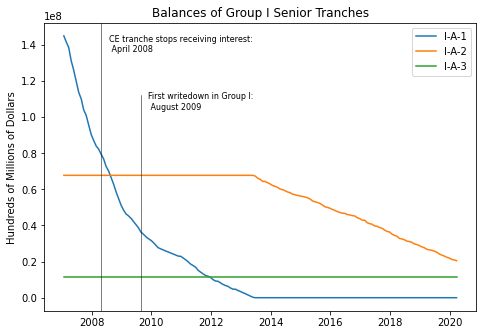

In [5]:
# This graph displays the outstanding balances of the Group I senior tranches over time
balances_groupI_senior = plt.figure()
balances_groupI_senior_axes = balances_groupI_senior.add_axes([0,0,1,1])
balances_groupI_senior_axes.plot(end_bal_IA1,label='I-A-1')
balances_groupI_senior_axes.plot(end_bal_IA2,label='I-A-2')
balances_groupI_senior_axes.plot(end_bal_IA3,label='I-A-3')
balances_groupI_senior_axes.legend()
balances_groupI_senior_axes.set_ylabel('Hundreds of Millions of Dollars')
balances_groupI_senior_axes.set_title('Balances of Group I Senior Tranches')
# Important date: I-CE tranche stops receiving interest
balances_groupI_senior_axes.axvline(interest_pmts_stop_ICE,color='black',lw=0.5)
balances_groupI_senior_axes.text(0.15, .9, 'CE tranche stops receiving interest: \n April 2008', \
    transform=balances_groupI_senior_axes.transAxes, fontsize=8)
# Important date: first writedown in Group I
balances_groupI_senior_axes.axvline(first_wd_date_group_I,color='black',lw=0.5,ymax=0.75)
balances_groupI_senior_axes.text(0.24, 0.7, 'First writedown in Group I: \n August 2009', transform=balances_groupI_senior_axes.transAxes,fontsize=8)
plt.show()

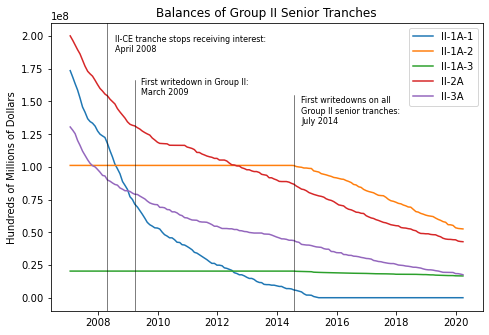

In [6]:
# This graph displays the outstanding balances of the Group II senior tranches over time
balances_groupII_senior = plt.figure()
balances_groupII_senior_axes = balances_groupII_senior.add_axes([0,0,1,1])
balances_groupII_senior_axes.plot(end_bal_II1A1,label='II-1A-1')
balances_groupII_senior_axes.plot(end_bal_II1A2,label='II-1A-2')
balances_groupII_senior_axes.plot(end_bal_II1A3,label='II-1A-3')
balances_groupII_senior_axes.plot(end_bal_II2A,label='II-2A')
balances_groupII_senior_axes.plot(end_bal_II3A,label='II-3A')
balances_groupII_senior_axes.legend()
balances_groupII_senior_axes.set_ylabel('Hundreds of Millions of Dollars')
balances_groupII_senior_axes.set_title('Balances of Group II Senior Tranches')
# Important date: II-CE tranche stops receiving interest
balances_groupII_senior_axes.axvline(interest_pmts_stop_IICE,color='black',lw=0.5)
balances_groupII_senior_axes.text(0.15, .9, 'II-CE tranche stops receiving interest:\nApril 2008', \
    transform=balances_groupII_senior_axes.transAxes, fontsize=8)
# Important date: first writedown in Group II
balances_groupII_senior_axes.axvline(first_wd_date_group_II,color='black',lw=0.5,ymax=0.8)
balances_groupII_senior_axes.text(0.21, 0.75, 'First writedown in Group II:\nMarch 2009', transform=balances_groupII_senior_axes.transAxes,fontsize=8)
# Important date: first writedowns on all senior tranches in Group II
balances_groupII_senior_axes.axvline(first_senior_wd_group_II,color='black',lw=0.5,ymax=0.75)
balances_groupII_senior_axes.text(0.58, 0.65, 'First writedowns on all\nGroup II senior tranches:\nJuly 2014', transform=balances_groupII_senior_axes.transAxes,fontsize=8)
plt.show()

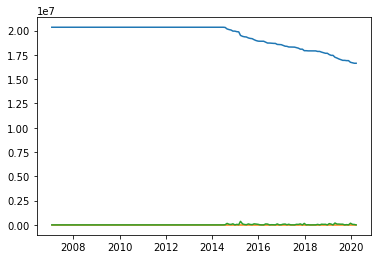

In [7]:
# Ending balance, principal payments and principal losses for II-1A-3 [exploratory]

plt.plot(bond_pmts.xs('II-1A-3',level=1)['Ending Certificate Balance'])
plt.plot(bond_pmts.xs('II-1A-3',level=1)['Principal Payment'])
plt.plot(bond_pmts.xs('II-1A-3',level=1)['Principal Adjustment or Loss'])

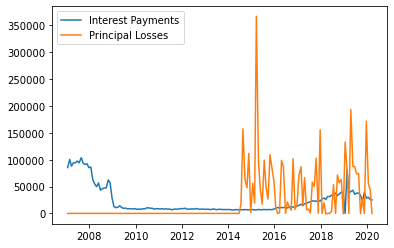

In [8]:
# Interest payments vs. principal losses for II-1A-3 [exploratory]
plt.plot(bond_pmts.xs('II-1A-3',level=1)['Interest Payment'],label='Interest Payments')
plt.plot(bond_pmts.xs('II-1A-3',level=1)['Principal Adjustment or Loss'],label='Principal Losses')
plt.legend()

## This function calculates and plots the approximate annual coupon rate for one security

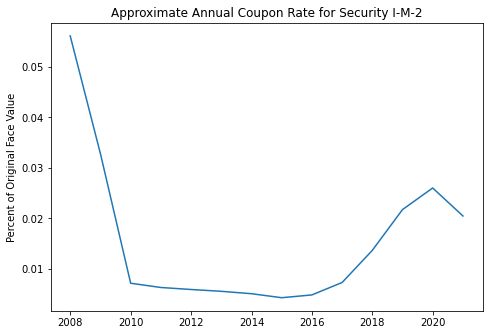

In [9]:
# Calculating the Annual 'coupon' (sum of interest payments as a percentage of original face value) for security I-A-3
def calc_avg_coupon(security,graph=False,pct_of_initial=True):
    approx_annual_coupon = pd.DataFrame(np.zeros(14),columns=['Approximate Yearly Coupon'])
    orig_face_value = bond_pmts.xs(security,level=1)['Original Face Value'].iloc[0]
    datetime_index = approx_annual_coupon.index.tolist()

    for year_index in range(13):
        # Add up all the interest payments for the year
        total_interest = bond_pmts.xs(security,level=1)['Interest Payment'].iloc[0+12*year_index:12+12*year_index].sum()
        if pct_of_initial:
            # Version 1: Calculate coupon as percentage of original face value
            approx_annual_coupon.loc[year_index] = total_interest / orig_face_value
        else:
            # Version 2: Calculate coupon as percentage of beginning-of-year face value
            year_end_face_value = bond_pmts.xs(security,level=1)['Ending Certificate Balance'].iloc[12*year_index]
            if year_end_face_value == 0:
                approx_annual_coupon.loc[year_index] = 0
            else:
                approx_annual_coupon.loc[year_index] = total_interest / year_end_face_value
        datetime_index[year_index] = pd.to_datetime(str(2007 + year_index)+'-12-31')
    total_interest_2020 = bond_pmts.xs(security,level=1)['Interest Payment'].iloc[-3:].sum()
    if pct_of_initial:
        # Version 1 [see above]
        est_coupon_2020 = total_interest_2020 * 4 / orig_face_value
    else:
        # Version 2 [see above]
        if bond_pmts.xs(security,level=1)['Ending Certificate Balance'].iloc[-1] == 0:
            est_coupon_2020 = 0
        else:
            est_coupon_2020 = total_interest_2020 * 4 / bond_pmts.xs(security,level=1)['Ending Certificate Balance'].iloc[-1]
    approx_annual_coupon.iloc[13] = est_coupon_2020
    datetime_index[13] = pd.to_datetime('2020-12-31')
    approx_annual_coupon['Date'] = datetime_index
    approx_annual_coupon.set_index('Date',inplace=True)
    if graph == True:
        avg_coupon_graph = plt.figure()
        axes = avg_coupon_graph.add_axes([0,0,1,1])
        axes.plot(approx_annual_coupon)
        axes.set_ylabel("Percent of Original Face Value")
        axes.set_title("Approximate Annual Coupon Rate for Security " + security)
    return approx_annual_coupon

coupon = calc_avg_coupon('I-M-2',graph=True,pct_of_initial=False)

## These next two cells display the level of protection afforded to each security by the subordination rules

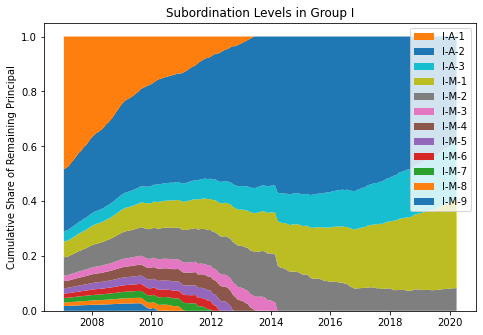

In [10]:
# Graph showing levels of subordination over time for Group I
groupI_tranches = ['I-A-1','I-A-2','I-A-3','I-M-1','I-M-2','I-M-3','I-M-4','I-M-5','I-M-6','I-M-7','I-M-8','I-M-9']
groupI_tranches.reverse()
groupI_CE_pct = pd.DataFrame()
groupI_sum_rem_bals = pd.DataFrame(np.zeros(159))
for name in groupI_tranches:
    groupI_CE_pct[name] = bond_pmts.xs(name,level=1)['Ending Certificate Balance']
groupI_sum_rem_bals.set_index(groupI_CE_pct.index,inplace=True)
groupI_sum_rem_bals.rename(columns={0:'Total Principal Remaining'},inplace=True)
for date in groupI_CE_pct.index:
    groupI_sum_rem_bals.loc[date] = groupI_CE_pct.loc[date].sum()
groupI_bals_for_graph = [0 for x in range(12)]
index = 0
for name in groupI_tranches:
    groupI_CE_pct[name] = groupI_CE_pct[name].divide(groupI_sum_rem_bals['Total Principal Remaining'])
    groupI_bals_for_graph[index]=list(groupI_CE_pct[name])
    index += 1
legend_for_graph = list(groupI_CE_pct.columns)
subordination_groupI = plt.figure()
subord_groupI_axes = subordination_groupI.add_axes([0,0,1,1])
subord_groupI_axes.stackplot(groupI_CE_pct.index,groupI_bals_for_graph,labels=legend_for_graph)
subord_groupI_axes.legend(reversed(plt.legend().legendHandles), reversed(legend_for_graph))
subord_groupI_axes.set_title("Subordination Levels in Group I")
subord_groupI_axes.set_ylabel("Cumulative Share of Remaining Principal")
subordination_groupI.savefig('../../figures/stackplot_share_of_principal_group_i.png',dpi=200,bbox_inches='tight')

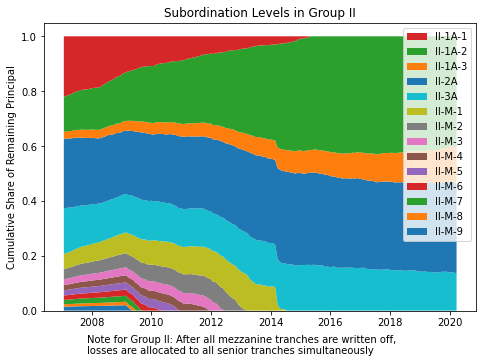

In [11]:
# Graph showing levels of subordination over time for Group II
groupII_tranches = ['II-1A-1','II-1A-2','II-1A-3','II-2A','II-3A','II-M-1','II-M-2','II-M-3','II-M-4','II-M-5','II-M-6','II-M-7','II-M-8','II-M-9']
groupII_tranches.reverse()
groupII_CE_pct = pd.DataFrame()
groupII_sum_rem_bals = pd.DataFrame(np.zeros(159))
for name in groupII_tranches:
    groupII_CE_pct[name] = bond_pmts.xs(name,level=1)['Ending Certificate Balance']
groupII_CE_pct
groupII_sum_rem_bals.set_index(groupII_CE_pct.index,inplace=True)
groupII_sum_rem_bals.rename(columns={0:'Total Principal Remaining'},inplace=True)
for date in groupII_CE_pct.index:
    groupII_sum_rem_bals.loc[date] = groupII_CE_pct.loc[date].sum()
groupII_bals_for_graph = [0 for x in range(14)]
index = 0
for name in groupII_tranches:
    groupII_CE_pct[name] = groupII_CE_pct[name].divide(groupII_sum_rem_bals['Total Principal Remaining'])
    groupII_bals_for_graph[index]=list(groupII_CE_pct[name])
    index += 1
legend_for_graph = list(groupII_CE_pct.columns)
subordination_groupII = plt.figure()
subord_groupII_axes = subordination_groupII.add_axes([0,0,1,1])
subord_groupII_axes.stackplot(groupII_CE_pct.index,groupII_bals_for_graph,labels=legend_for_graph)
subord_groupII_axes.legend(reversed(plt.legend().legendHandles), reversed(legend_for_graph))
subord_groupII_axes.set_title("Subordination Levels in Group II")
subord_groupII_axes.set_ylabel("Cumulative Share of Remaining Principal")
subord_groupII_axes.text(0.1,-0.15,'Note for Group II: After all mezzanine tranches are written off,\nlosses \
are allocated to all senior tranches simultaneously',transform=subord_groupII_axes.transAxes)
subordination_groupII.savefig('../../figures/stackplot_share_of_principal_group_ii.png',dpi=200,bbox_inches='tight')

# Conclusions from today's work
1. Principal payments were only made to II-1A-1, II-2A and II-3A as the deal began, but when writedowns began on the senior tranches, all of them were hit
2. Group II actually had all of its junior tranches written off in mid-2014, and I-M-1 and I-M-2 still have principal left
3. The I-A-3 security (owned by Maiden Lane) has never gotten any principal payments and has been taking principal writedowns (albeit slowly) since mid-2014, and its interest payments were minimal from 2010-2016, then rose when the Fed started hiking rates, and are now beginning to fall

a. I want to also look at the time series of principal writedowns to get a feel for just how much the Fed is making/losing on this, and then I'll do the same sort of analysis for II-A1-3 (the other Maiden Lane security)

4. New theory: Lower senior tranches are effectively in a state of MBS limbo, and perhaps their offered yields should be higher because, as I see it, they are the most undesirable tranche

a. My thinking: Junior tranches are enticing because they offer high interest payments, and high senior tranches are enticing because they will most likely allow you to get your money back fast, but being in something like I-A-3 in this deal just leaves you sitting around forever waiting to get your money back, without a super-high interest rate to compensate you for your time, and without the credit protection obtained by the very top tranche

b. TOPIC TO DISCUSS: this idea -- how can I expand on/evaluate my new claim?

5. Another TOPIC TO DISCUSS: since I have credit ratings data, I want to evaluate whether rating downgrades were a reliable leading indicator of future writedowns, or if these happened at roughly the same time, or if there really isn't a discernible relationship

6. CHECK if I'm doing the security coupon rate calculation correctly -- also, how would I do a weighted average across all tranches? Would I just add up all interest payments for a particular month and divide that by the principal remaining at that point?


In [12]:
# Calculate annual coupon for every single tranche [note: if the principal balance is zero, coupon is also zero]
tranche_list_I = [x for x in groupI_tranches]
tranche_list_I.reverse()
tranche_list_II = [x for x in groupII_tranches]
tranche_list_II.reverse()
tranche_list = tranche_list_I + tranche_list_II
all_coupon_data = pd.DataFrame()
for security in tranche_list:
    all_coupon_data[security] = calc_avg_coupon(security)['Approximate Yearly Coupon']
print("Annual Coupon Rates For All Securities")
all_coupon_data

Annual Coupon Rates For All Securities


,I-A-1,I-A-2,I-A-3,I-M-1,I-M-2,I-M-3,I-M-4,I-M-5,I-M-6,I-M-7,...,II-3A,II-M-1,II-M-2,II-M-3,II-M-4,II-M-5,II-M-6,II-M-7,II-M-8,II-M-9
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,0.044798,0.054676,0.055078,0.056084,0.056184,0.056486,0.057592,0.057793,0.058497,0.070765,...,0.047111,0.055581,0.055681,0.055983,0.056586,0.056787,0.057491,0.061715,0.068754,0.075290
2008-12-31,0.015528,0.031252,0.031659,0.032676,0.032777,0.033082,0.034201,0.034404,0.035116,0.047519,...,0.020818,0.032167,0.032269,0.032574,0.033184,0.033387,0.034099,0.038369,0.045486,0.052094
2009-12-31,0.001340,0.005594,0.006002,0.007022,0.007124,0.007429,0.008551,0.008755,0.009468,0.021906,...,0.002910,0.006512,0.006614,0.006920,0.007531,0.007735,0.007913,0.008296,0.009848,0.008318
2010-12-31,0.000691,0.004764,0.005168,0.006180,0.006281,0.006584,0.007696,0.007898,0.008606,0.020942,...,0.002081,0.005674,0.005775,0.006078,0.006685,0.005317,0.000805,0.000000,0.000000,0.000000
2011-12-31,0.000402,0.004363,0.004769,0.005783,0.005884,0.006188,0.007303,0.007506,0.008216,0.014872,...,0.001650,0.005276,0.005377,0.005681,0.003589,0.000000,0.000000,0.000000,0.000000,0.000000
2012-12-31,0.000178,0.004474,0.004879,0.005429,0.005522,0.005802,0.006556,0.004907,0.001765,0.000216,...,0.001535,0.005386,0.004372,0.001493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-12-31,0.000020,0.003894,0.004372,0.004953,0.005046,0.005159,0.001434,0.000000,0.000000,0.000000,...,0.001246,0.003850,0.000117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-31,0.000000,0.003163,0.004004,0.005018,0.004253,0.000859,0.000000,0.000000,0.000000,0.000000,...,0.000988,0.000742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-12-31,0.000000,0.003105,0.004350,0.005370,0.003111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
# Checking the calc_avg_coupon function for I-A-1 in 2007 [random example]
total_pmts = bond_pmts.xs('I-A-1',level=1)['Interest Payment'].loc['2007-01-01':'2007-12-31'].sum()
face_value = bond_pmts.xs('I-A-1',level=1)['Original Face Value'].iloc[0]
total_pmts / face_value # Outcome: function computes correctly compared to what I'd think of as the annual coupon rate (compare to the values in the Annual Coupon Rates table)

0.04479796407145036

In [14]:
# Code used to fix mismatched CUSIPS in bond_payments.pkl [all done, this doesn't need to be used again]
bond_pmts = bond_pmts.reindex(['I-A-1','I-A-2','I-A-3','I-M-1','I-M-2','I-M-3','I-M-4','I-M-5','I-M-6', \
                   'I-M-7','I-M-8','I-M-9','I-CE','I-P','I-R-1','I-R-2','I-R-3','I-RX', \
                   'II-1A-1','II-1A-2','II-1A-3','II-2A','II-3A','II-M-1','II-M-2','II-M-3', \
                   'II-M-4','II-M-5','II-M-6','II-M-7','II-M-8','II-M-9','II-CE','II-P', \
                   'II-R-1','II-RX'],level=1)
bond_pmts['CUSIP'] = ['07389RAA4','07389RAB2','07389RAC0','07389RAD8','07389RAE6','07389RAF3', \
                     '07389RAG1', '07389RAH9','07389RAJ5','07389RAK2','07389RAL0','07389RAM8', \
                     '07389RBE5','07389RBD7','07389RBG0','07389RBH8','07389RBJ4','07389RBF2','07389RAN6', \
                     '07389RAP1','07389RAQ9','07389RAR7','07389RAS5','07389RAT3','07389RAU0', \
                     '07389RAV8','07389RAW6','07389RAX4','07389RAY2','07389RAZ9','07389RBA3', \
                     '07389RBB1','07389RBK1','07389RBN5','07389RBL9','07389RBM7']*159
bond_pmts.to_pickle('../../data/mbs_data_pickled/bond_pmts.pkl')